# The basic building blocks
In this notebook we will take a closer look at elements used in computation in most machine learning systems, the **tensor**.

A tensor is a generalization of vectors and matrices to an arbitrary number of **axes**. What does that mean? A scalar, or a single value, is a 0D tensor. A vector is a 1D tensor. A matrix is a 2D tensor and so on. When a new axis is added we increase the dimension of the tensor. The usage of the word **dimension** can be confusing as it is used to refer to the number of axes as well as the number of elements along an axis. We can eliminate this ambiguity by talking about the **rank** of a tensor as the number of axes it has. Similarly we also refer to the **shape** of the tensor as vector which describes the number of dimensions along each axis of a tensor. The picture below will show you how to think of tensors and their rank visually:

![Tensors](images/tensor.jpeg)

R uses the internal data type `vector` to manipulate 0D and 1D tensors and the [`matrix`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/matrix) data type to manipulate 2D tensors. For higher dimensional data the [`array`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/array) data type is used. To better understand these concepts and how they relate to R, you will make the following excercise:

## Excercise 1
In the following cell complete the following tasks:
1. Using R's [`c`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/c) function, define a 0D tensor called 'x' with the value 4:
$$
x =
\left(
\begin{array}{c}
4 \\
\end{array}
\right)
$$
2. Again using [`c`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/c), define a 1D tensor called 'y':
$$
y =
\left(
\begin{array}{c}
1\\
2\\
3\\
4\\
\end{array}
\right)
$$
3. With the [`matrix`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/matrix) function, define a 2D tensor called 'Z':
$$
Z =
\left(
\begin{array}{c}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
\end{array}
\right)
$$
4. Print the dimensions of each tensor using [`dim`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/dim) (use the `as.array()` function to get meaningful results for 1. and 2.)

In [1]:
x <- c(4)
y <- c(1, 2, 3, 4)
Z <- matrix(c(c(1, 5), c(2, 6), c(3, 7), c(4, 8)), nrow = 2)
dim(as.array(x))
dim(as.array(y))
dim(Z)

[1] 1

[1] 4

[1] 2 4

In deep learning you will encounter data in various tensor dimensions
- Vector data, 2D (samples, features)
- Time-series, 3D (samples, timesteps, features)
- Images, 4D (samples, height, width, channel) or (samples, channel, height, width)

## Manipulating tensors
Deep learning involves usually involves a lot of preprocessing of data to get it into the right shape for a model to train on. Often, you will need to manipulate a tensor's dimensions and axes, and it is crucial to understand how this works in R.

During the course you will have plenty of opportunity to explore the different techniques with which R provides us. 

### Slicing
The first technique we will discuss is **slicing**. With the bracket operators `[` and `]` we can slice data from a tensor by specifying the index or indices for axes we want to select:

In [2]:
z <- matrix(c(1, 2, 3, 4, 5, 6),  ncol=2)
z # This will show z

slice <- z[1,] # This will slice the first row
slice # This will show the slice

1,4
2,5
3,6


[1] 1 4

In [3]:
z[,1] # This will slice the first column

[1] 1 2 3

In [4]:
z[1:2, 1] # This will extract the first two elements of the first column

[1] 1 2

## Exercise 2
In the next cell we have defined a two-dimensional tensor called `Z`. It is a matrix of size 4 by 4. Extract the 'bottom right' section of the matrix, with size 2 by 2, pictured as the numbers in red in the following diagram:

$$
Z =
\left(
\begin{array}{cccc}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & \color{red}{11} & \color{red}{12} \\
13 & 14 & \color{red}{15} & \color{red}{16} \\
\end{array}
\right)
$$

In [5]:
Z <- matrix(c(1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15, 4, 8, 12, 16), ncol = 4)
Z[3:4, 3:4]

11,12
15,16


## Exercise 3
In the next cell we have defined a three-dimensional tensor, also called `Z`. It is of size 4 by 4 by 4, and you can think of it as a cube. Extract the middle of the cube, with dimensions 2 by 2 by 2. The result (in R) should be:

```
22 23 26 27 38 39 42 43 
```

Please note that because we cannot easily visualise a three-dimensional tensor, R will give a list of numbers as its output.

In [6]:
Z <- array(1:64, dim = c(4, 4, 4))  # 1:64 will generate a vector with elements 1, 2 ... 64
Z[2:3, 2:3, 2:3]

, , 1

     [,1] [,2]
[1,]   22   26
[2,]   23   27

, , 2

     [,1] [,2]
[1,]   38   42
[2,]   39   43

## Tensor arithmetic

There are a number of operations which can be performed on tensors, the first one is an **element-wise** operation, which applies a function to each element of the tensor independently. By default `+` and `*` in R are element-wise operations.

In [7]:
z <- matrix(c(1, 2, 3, 4), nrow=2, ncol=2) 
z
a <- z * z
a

1,3
2,4


1,9
4,16


In [8]:
z + z

2,6
4,8


### Multiplication
The **multiplication** of two tensors returns a new tensor and is denoted by `%*%` in R. The multiplication will calculate the product for each row and column in the two tensors as follows:

![Dot product](./images/Matrix_multiplication_diagram_2.svg)
[[source]](https://en.wikipedia.org/wiki/Matrix_multiplication)

In the following example the output tensor is of the same dimensions as the two input tensors.

In [9]:
A <- matrix(c(1, 2, 3, 4), ncol = 2)
A
A %*% A

1,3
2,4


7,15
10,22


In [10]:
A <- matrix(1:4, ncol = 2)
A
B <- matrix(5:8, ncol = 2)
B

1,3
2,4


5,7
6,8


In [11]:
A %*% B

23,31
34,46


## Exercise 4
Calculate the following matrix multiplication:

$$
\left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\left(
\begin{array}{cc}
5 & 6 \\
7 & 8 \\
\end{array}
\right)
=
\left(
\begin{array}{cc}
19 & 22 \\
43 & 50 \\
\end{array}
\right)
$$

In [13]:
matrix(c(1, 3, 2, 4), nrow = 2) %*% matrix(c(5, 7, 6, 8), nrow = 2)

19,22
43,50


## Exercise 5
Calculate the following multiplication of a matrix with a vector:

$$
\left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\left(
\begin{array}{c}
1\\
2\\
\end{array}
\right)
=
\left(
\begin{array}{c}
5\\
11\\
\end{array}
\right)
$$

In [14]:
matrix(c(1, 3, 2, 4), nrow = 2) %*% c(1, 2)

5
11


### Transposition
Transposition will flip a matrix over its main diagonal, like so:

$$
\left(
\begin{array}{cc}
1 & 2\\
3 & 4\\
\end{array}
\right)^T
=
\left(
\begin{array}{cc}
1 & 3\\
2 & 4\\
\end{array}
\right)
$$

R has a [`t`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/t) function to do so:

In [15]:
a <- matrix(c(1, 3, 2, 4), ncol = 2)
a
t(a)

1,2
3,4


1,3
2,4


## Exercise 6
Create a matrix with 1 column and 1 row and transpose it. Inspect the dimensions with the [`dim`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/dim) function. Try the same with a vector. What happens?

In [23]:
M <- matrix(c(1), nrow = 1, ncol = 1)
dim(M)
dim(t(M)) # Dimensions stay the same when transposing matrices

v <- c(1)
dim(v) # A vector in R does not have a row or column dimension
dim(t(v)) # Transposition will turn the vector into a matrix of 1 column and 1 row

[1] 1 1

[1] 1 1

NULL

[1] 1 1

You will see that any vector that is transposed is automatically converted into a matrix. R has no concept of a row vector or column vector. Instead, it uses a matrix with one dimension set to 1, as you saw above.

# Building a single dense layer
In the remainder of this notebook you will solve the problem introduced in the slides. Let's load the data first:

In [24]:
source("01-helpers.R")  # this will load helper functions for this session

data <- dataset_linear()
X <- data$X
y <- data$y

We inspect the input variables `X` and the labels `y` using the [`head`](https://www.rdocumentation.org/packages/utils/versions/3.5.1/topics/head) function.

In [25]:
head(X)

x1,x2
0.1996392,0.4562954
0.1414231,0.2973767
0.3190954,0.4629799
0.3784599,0.4572429
0.2453274,0.3714641
0.2735707,0.1760050


In [26]:
head(y)

[1] 0 0 0 0 0 0
Levels: 0 1

## Exercise 7
Inspect the dimensions of `X` and `y`. How many instances do we have? How many input variables?

In [28]:
dim(X)  # 50 instances, 2 input variables
length(y)

[1] 50  2

[1] 50

Let's plot the data set using one of the helper functions you just loaded:

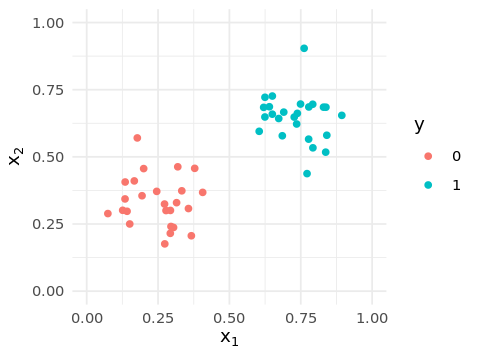

In [29]:
plot_dataset(X, y)

# Solving the problem - building a neuron
During the remainder of this notebook you will build a single neuron that will perfectly classify all instances.

Let's look at a diagram of this neuron you are going to build:

![The neuron we are going to build](images/neuron.png)

You will build this neuron step by step, going from left to right through the diagram. Let's begin by defining the neuron's weights:

## Exercise 8
The neuron will have two weights, one for each input, $w_1$ and $w_2$. Create a weight vector `w` with the values `0.5` and `0`.

In [30]:
w <- c(0.5, 0)
w

[1] 0.5 0.0

## Exercise 9
Create the bias variable `b`. Set it to `0` for now. This means that we will ignore its effect in subsequent calculations. You will modify it later in order to solve the problem.

In [31]:
b <- 0
b

[1] 0

## Exercise 10
Create the sigmoid activation function `sigmoid`, which takes a vector or number `x` and returns as output the following:
$$
\sigma(x) = sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

We have provided you with a skeleton below:

**Hint**: you will need R's [`exp`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/log) function.

In [32]:
sigmoid <- function(x) {
    1 / (1 + exp(-x))
}

## Exercise 11
Perform the complete calculation of the neuron in R. You can either use the diagram as a reference above, or use the following equation:

$$
\hat{y} = \sigma(\mathbf{w} \mathbf{X}^\top + b)
$$

The result should be a matrix with **1 row and 50 columns**.

In [38]:
w %*% t(X) + b

0.0998196,0.07071153,0.1595477,0.18923,0.1226637,0.1367853,0.1521444,0.1466655,0.1574736,0.08866246,⋯,0.3100344,0.4186631,0.3745815,0.4190436,0.345187,0.3690141,0.3891087,0.3022006,0.363549,0.3251728


## Exercise 12
Put the calculation above in an R function called `neuron` that takes as its input an input matrix `X` and returns the neuron's output. We will use this function for easily recalculating the neuron's output when modifying the weights and bias of the neuron.

We have provided you with a skeleton to fill in below:

In [44]:
neuron <- function(X) {
    sigmoid(w %*% t(X) + b)
}

## Exercise 13
Apply the function you defined above to the input matrix `X`.

The results will be the probability of the instance belonging to the positive class (the blue one). For classification problems we usually threshold the this probability, with a value larger than $0.5$ meaning the instance is classified as positive (the 'blue' class in our case). Given the probabilities and the labels in `y`, how do you think your classifier is performing?

In [45]:
neuron(X)  # All elements of the output are bigger than 0.5, so all instances are classified as class 1 (blue)

0.5249342,0.5176705,0.5398025,0.5471668,0.5306275,0.5341431,0.5379629,0.5366008,0.5392872,0.5221511,⋯,0.5768937,0.6031633,0.5925656,0.6032544,0.58545,0.5912207,0.5960681,0.5749804,0.5898993,0.5805844


Let's plot the results of your prediction with a helper function that we have created for you, called `plot_predictions`:

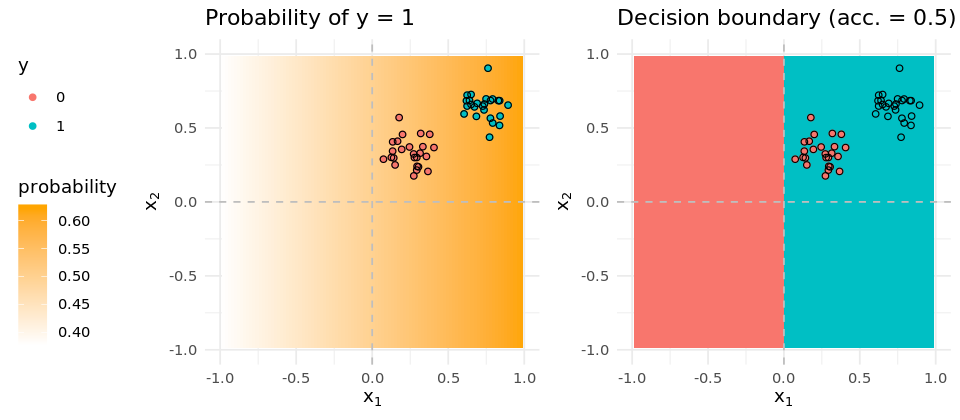

In [46]:
plot_predictions(X, y, neuron)

As you can see, our accuracy is 50% simply because all instances are positive (blue). We need to tweak the decision boundary in order to get 100% accuracy.

## Exercise 14
Modify the weights `w` and the bias variables `b` such that you classify the instances with 100% accuracy. Plot the probabilities and decision boundary based on your new weights and bias.

How do the bias and weights affect the decision boundary?

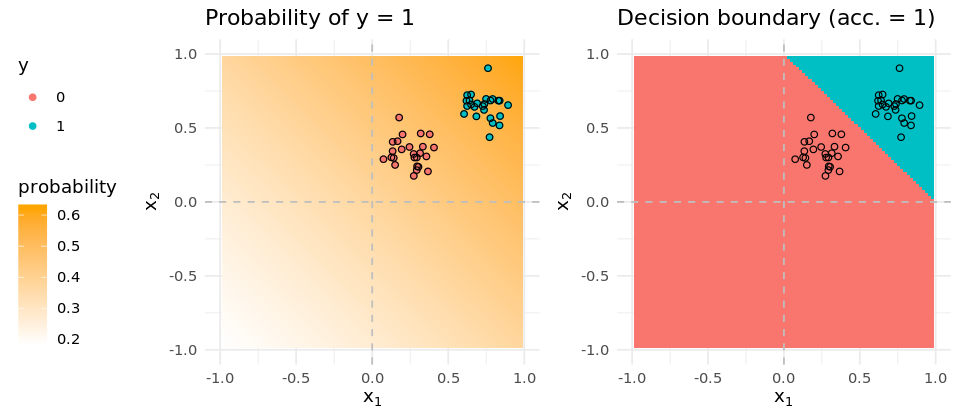

In [52]:
w <- c(0.5, 0.5)
b <- -0.5
plot_predictions(X, y, neuron) # w controls the 'slope' of the decision boundary, b shifts it